In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
# create a dataframe
df_sample = pd.DataFrame([["day1","day2","day1","day2","day1","day2"],
                          ["A","B","A","B","C","C"],
                          [100,150,200,150,100,50],
                          [120,160,100,180,110,80]] ).T

In [3]:
df_sample

,0,1,2,3
0,day1,A,100,120
1,day2,B,150,160
2,day1,A,200,100
3,day2,B,150,180
4,day1,C,100,110
5,day2,C,50,80


In [4]:
# name on column
df_sample.columns = ["day_no","class","score1","score2"]

In [5]:
# index on row
df_sample.index   = [11,12,13,14,15,16]

In [6]:
df_sample

,day_no,class,score1,score2
11,day1,A,100,120
12,day2,B,150,160
13,day1,A,200,100
14,day2,B,150,180
15,day1,C,100,110
16,day2,C,50,80


In [7]:
# get column name
df_sample.columns

Index([u'day_no', u'class', u'score1', u'score2'], dtype='object')

In [8]:
# get row index
df_sample.index

Int64Index([11, 12, 13, 14, 15, 16], dtype='int64')

In [9]:
# Rename
df_sample.rename(columns={'score1': 'point1'})

,day_no,class,point1,score2
11,day1,A,100,120
12,day2,B,150,160
13,day1,A,200,100
14,day2,B,150,180
15,day1,C,100,110
16,day2,C,50,80


In [10]:
# No. of row
len(df_sample)

6

In [11]:
# No. of dimention
df_sample.shape

(6, 4)

In [12]:
# column information
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 11 to 16
Data columns (total 4 columns):
day_no    6 non-null object
class     6 non-null object
score1    6 non-null object
score2    6 non-null object
dtypes: object(4)
memory usage: 240.0+ bytes


In [13]:
# summary
df_sample.describe()

,day_no,class,score1,score2
count,6,6,6,6
unique,2,3,4,6
top,day1,B,150,110
freq,3,2,2,1


In [14]:
# head / tail
df_sample.head(2)

,day_no,class,score1,score2
11,day1,A,100,120
12,day2,B,150,160


In [20]:
# select (a) column
df_sample[["day_no", "score1"]]

,day_no,score1
11,day1,100
12,day2,150
13,day1,200
14,day2,150
15,day1,100
16,day2,50


In [21]:
# select row & column
df_sample.loc[:, ["day_no", "score1"]]

,day_no,score1
11,day1,100
12,day2,150
13,day1,200
14,day2,150
15,day1,100
16,day2,50


In [22]:
# select row & column
df_sample.iloc[:, 0:2]

,day_no,class
11,day1,A
12,day2,B
13,day1,A
14,day2,B
15,day1,C
16,day2,C


In [26]:
# select row & column
df_sample.ix[10:12, ["day_no", "score1"]]

,day_no,score1
11,day1,100
12,day2,150


In [27]:
# select row & column
series_bool = [True, False, True, False]
df_sample.ix[:, series_bool]

,day_no,score1
11,day1,100
12,day2,150
13,day1,200
14,day2,150
15,day1,100
16,day2,50


In [28]:
# select under condition(s) : Use '"'  
df_sample.query("day_no == 'day1' | day_no == 'day2'")

,day_no,class,score1,score2
11,day1,A,100,120
12,day2,B,150,160
13,day1,A,200,100
14,day2,B,150,180
15,day1,C,100,110
16,day2,C,50,80


In [29]:
# select under condition(s) : Use '@'
select_condition = "day1"
df_sample.query("day_no == @select_condition")

,day_no,class,score1,score2
11,day1,A,100,120
13,day1,A,200,100
15,day1,C,100,110


In [32]:
# sort
df_sample.sort_values(["score1","score2"])

,day_no,class,score1,score2
16,day2,C,50,80
15,day1,C,100,110
11,day1,A,100,120
12,day2,B,150,160
14,day2,B,150,180
13,day1,A,200,100


In [33]:
df_sample.sort_values("score1",ascending=False)

,day_no,class,score1,score2
13,day1,A,200,100
12,day2,B,150,160
14,day2,B,150,180
11,day1,A,100,120
15,day1,C,100,110
16,day2,C,50,80


In [34]:
# add new row
# create a new row
df_addition_row = pd.DataFrame([["day1","A",100,180]])
df_addition_row.columns = ["day_no","class","score1","score2"]
df_addition_row.index   = [17]

# union / rbind
pd.concat([df_sample,df_addition_row], axis=0)

,day_no,class,score1,score2
11,day1,A,100,120
12,day2,B,150,160
13,day1,A,200,100
14,day2,B,150,180
15,day1,C,100,110
16,day2,C,50,80
17,day1,A,100,180


In [37]:
# add new column
df_addition_col = pd.DataFrame([[120,160,100,180,110,80]]).T
df_addition_col.columns = ["score3"]
df_addition_col.index   = [11,12,13,14,15,16] 

# join / cbind
pd.concat([df_sample, df_addition_col], axis=1)

,day_no,class,score1,score2,score3
11,day1,A,100,120,120
12,day2,B,150,160,160
13,day1,A,200,100,100
14,day2,B,150,180,180
15,day1,C,100,110,110
16,day2,C,50,80,80


In [38]:
# Differences of Index between original tbl & additional tbl causes FULL OUTER JOIN
df_addition_col = pd.DataFrame([[120,160,100,180,110,80]]).T
df_addition_col.columns =["score3"]
df_addition_col.index   = [11,12,13,21,22,23]

pd.concat([df_sample, df_addition_col], axis=1)

,day_no,class,score1,score2,score3
11,day1,A,100,120,120
12,day2,B,150,160,160
13,day1,A,200,100,100
14,day2,B,150,180,NaN
15,day1,C,100,110,NaN
16,day2,C,50,80,NaN
21,NaN,NaN,NaN,NaN,180
22,NaN,NaN,NaN,NaN,110
23,NaN,NaN,NaN,NaN,80


In [ ]:
# import csv data
#pd.read_csv("path_of_data")

# export csv data
#pd.to_csv("path_of_exported_file")

In [15]:
data = pd.read_csv("iris.csv", header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
data2 = pd.DataFrame(data)
data2.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
data2.columns = ["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species"]
data2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
data2.ix[0:5, :].query("Species == 'setosa'")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [83]:
data2.shape

(150, 5)

In [90]:
data2.ix[:, "Species"].describe()

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [101]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [19]:
pd.pivot_table(data2, columns="Species", aggfunc=np.mean)

Species,setosa,versicolor,virginica
Petal.Length,1.464,4.260,5.552
Petal.Width,0.244,1.326,2.026
Sepal.Length,5.006,5.936,6.588
Sepal.Width,3.418,2.770,2.974


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10da117d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10dbecb90>]], dtype=object)

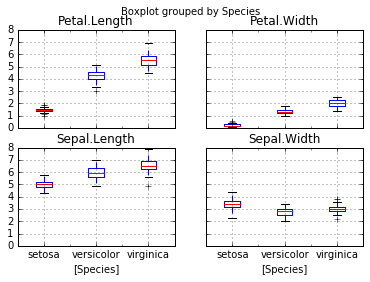

In [111]:
data2.boxplot(by="Species")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e17a390>]], dtype=object)

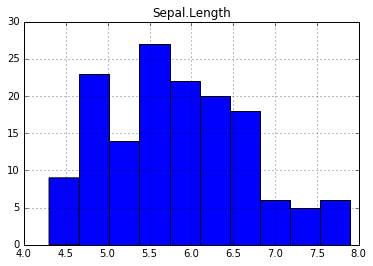

In [112]:
data2.hist("Sepal.Length")